In [29]:
%matplotlib inline

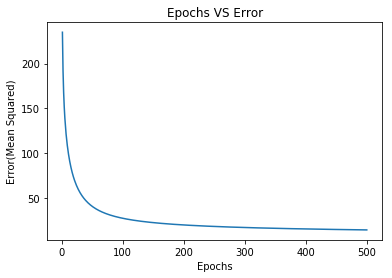

Weights:[22.372259301885396, -17.064568481343244, -16.83407196020748, -18.09250736939344, 1.223724163766519]


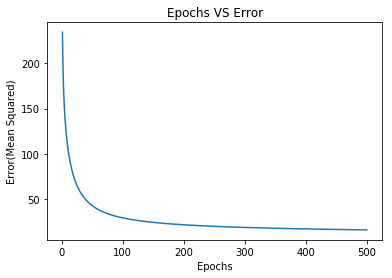

Weights:[22.419722300384834, -17.03182535776707, -16.951420367701367, -18.31087265936182, 1.2929605566355253]


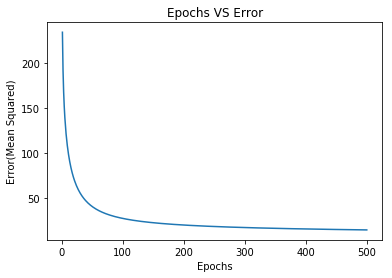

Weights:[22.223370206108093, -17.364256213909155, -16.533629517432207, -17.999367811231984, 1.3573053409912377]


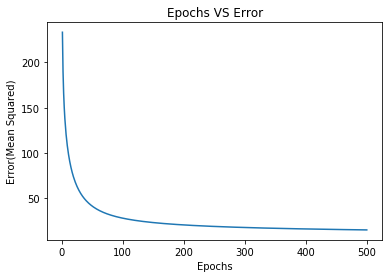

Weights:[22.285130256208962, -17.204452377213542, -16.631405978016932, -18.014405910866845, 1.2748834042361348]


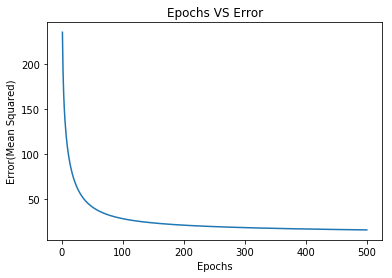

Weights:[22.108624046636567, -17.34933053114359, -16.307572974820655, -17.91457498716834, 1.3077229252491072]
Accuracies: [97.8102189781022, 98.90510948905109, 97.8102189781022, 97.8102189781022, 98.54014598540147]
F-Scores: [0.9776119402985075, 0.9879518072289156, 0.976, 0.9747899159663866, 0.9829059829059829]
Mean Accuracy: 98.175
Accuracy stddev: 0.516
Mean F-Score: 0.980
F-score stddev: 0.005


In [31]:
# Logistic Regression on the Dataset
from random import seed
from random import randrange
from csv import reader
from math import exp
from statistics import stdev
import matplotlib.pyplot as plt
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

def f_score_metric(actual,predicted):
	true_pos=0
	true_neg=0
	false_pos=0
	false_neg=0
	for i in range(len(actual)):
		if actual[i] == predicted[i] and predicted[i]==1:#true pos
			true_pos += 1
		elif actual[i] == predicted[i] and predicted[i]==0:#true neg
			true_neg += 1
		elif actual[i] ==0 and predicted[i]==1:#false pos
			false_pos+= 1
		else:
			false_neg+=1
	precision =true_pos/(true_pos+false_pos)
	recall = true_pos/(true_pos+false_neg)
	f_score=2*precision*recall/(precision+recall)
	return f_score

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    accuracies = list()
    f_scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        f_score=f_score_metric(actual,predicted)
        accuracies.append(accuracy)
        f_scores.append(f_score)
        
    return accuracies,f_scores


# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))

# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    errors=list()
    coef = [0.0 for i in range(len(train[0]))]
    sum_error = None
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            error = row[-1] - yhat
            sum_error+= error*error
            coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
        errors.append(sum_error) 
    x = [i for i in range(1,len(errors)+1)] 
    # corresponding y axis values 
    y = errors 
    # plotting the points  
    plt.plot(x, y) 
    # naming the x axis 
    plt.xlabel('Epochs') 
    # naming the y axis 
    plt.ylabel('Error(Mean Squared)') 
    # giving a title to my graph 
    plt.title('Epochs VS Error') 
    # function to show the plot 
    plt.show()
    return coef

def coefficients_sgd_l1(train, l_rate, n_epoch,lamda=0.001):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict(row, coef)
            error = row[-1] - yhat
            if coef[0]>=0:
                coef[0] = coef[0] + l_rate * ( error * yhat * (1.0 - yhat) + lamda)
            else:
                coef[0] = coef[0] + l_rate * ( error * yhat * (1.0 - yhat) - lamda)
            for i in range(len(row)-1):
                if coef[i+1]>=0:
                    coef[i + 1] = coef[i + 1] + l_rate * ( error * yhat * (1.0 - yhat) * row[i] +lamda)
                else:
                    coef[i + 1] = coef[i + 1] + l_rate * ( error * yhat * (1.0 - yhat) * row[i] -lamda)
    return coef

def coefficients_sgd_l2(train, l_rate, n_epoch,lamda=0.00000001):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            yhat = predict(row, coef)
            error = row[-1] - yhat
            coef[0] = coef[0] + l_rate * ( error * yhat * (1.0 - yhat) + lamda*coef[0] )
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] + l_rate * ( error * yhat * (1.0 - yhat) * row[i]+ lamda*coef[i+1] )
    return coef


# Linear Regression Algorithm With Stochastic Gradient Descent
def logistic_regression(train, test, l_rate, n_epoch,lamda):
    predictions = list()
    coef = coefficients_sgd(train, l_rate, n_epoch)#additional lamda for l1 and l2 to be given
    print('Weights:%s'% coef)
    for row in test:
        yhat = predict(row, coef)
        yhat = round(yhat)
        predictions.append(yhat)
    return(predictions)

# Test the logistic regression algorithm on the diabetes dataset
seed(1)
# load and prepare data
filename = 'data_banknote_authentication.csv'
dataset = load_csv(filename)#this dataset is a list of list of strings

#convert dataset to a list of list of floats
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
    
# normalize
minmax = dataset_minmax(dataset)#Dx2 list each row consisting of min and max value of that feature d 
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.1
n_epoch = 500
lamda=0.0001
accuracies,f_scores = evaluate_algorithm(dataset, logistic_regression, n_folds, l_rate, n_epoch,lamda)
print('Accuracies: %s' % accuracies)
print('F-Scores: %s' % f_scores)
print('Mean Accuracy: %.3f' % (sum(accuracies)/float(len(accuracies))))
print('Accuracy stddev: %.3f' % stdev(accuracies))
print('Mean F-Score: %.3f' % (sum(f_scores)/float(len(f_scores))))
print('F-score stddev: %.3f' % stdev(f_scores))